### MODELS IMPLEMENTED

### 2. CLUSTERING

Clustering is an unsupervised learning technique used to group similar data points based on their characteristics. Unlike classification, clustering does not rely on labeled data but instead identifies natural patterns within the dataset. This process helps in data segmentation, pattern recognition, and exploratory analysis, making it a crucial step in understanding complex datasets.

### K-Means clustering

K-Means clustering was applied to the dataset to identify natural groupings. The Silhouette Method was used to determine the optimal number of clusters, with k=2 emerging as the best choice. The clustering results were visualized, showing that two distinct groups provide the most meaningful segmentation. Higher k values resulted in overlapping and redundant clusters, confirming that k=2 is the most efficient and interpretable solution for this dataset.

In [1]:
# load the cleaned dataset
import pandas as pd

file_path = "/content/bank_cleaned_data.csv"
df_cleaned = pd.read_csv(file_path)

df_cleaned.info(), df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          45211 non-null  object
 2   marital      45211 non-null  object
 3   education    45211 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      45211 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     45211 non-null  object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(None,
    age           job  marital  education default  balance housing loan  \
 0   58    management  married   tertiary      no     2143     yes   no   
 1   44    technician   single  secondary      no       29     yes   no   
 2   33  entrepreneur  married  secondary      no        2     yes  yes   
 3   47   blue-collar  married  secondary      no     1506     yes   no   
 4   33   blue-collar   single  secondary      no        1      no   no   
 
    contact  day_of_week month  duration  campaign  pdays  previous poutcome  \
 0  Unknown            5   may       261         1     -1         0  Unknown   
 1  Unknown            5   may       151         1     -1         0  Unknown   
 2  Unknown            5   may        76         1     -1         0  Unknown   
 3  Unknown            5   may        92         1     -1         0  Unknown   
 4  Unknown            5   may       198         1     -1         0  Unknown   
 
     y  
 0  no  
 1  no  
 2  no  
 3  no  
 4  no  )

Data Selection & Preprocessing

* Label Removal: The target variable (y) was removed and stored separately for later comparison with clustering results.

* Selecting Numerical Features: Only numerical columns were retained to ensure compatibility with clustering algorithms.

* Data Normalization: Standardized all numerical features using StandardScaler, ensuring that each has a mean of 0 and standard deviation of 1 to prevent scale-related bias.

In [2]:
# remove the label column ('y') and store it separately for later comparison
labels = df_cleaned['y'].map({'yes': 1, 'no': 0})  # Convert categorical labels to binary values
df = df_cleaned.drop(columns=['y'])  # Remove label from dataset

df.to_csv("df.csv", index=False)

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,Unknown,5,may,261,1,-1,0,Unknown
1,44,technician,single,secondary,no,29,yes,no,Unknown,5,may,151,1,-1,0,Unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,Unknown,5,may,76,1,-1,0,Unknown
3,47,blue-collar,married,secondary,no,1506,yes,no,Unknown,5,may,92,1,-1,0,Unknown
4,33,blue-collar,single,secondary,no,1,no,no,Unknown,5,may,198,1,-1,0,Unknown


In [4]:
# keep only numerical columns for clustering
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numerical_cols]

df_numeric.to_csv("df_numeric_clustering.csv", index=False)

In [5]:
df_numeric.head()

,age,balance,day_of_week,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [6]:
# normalize the numerical data using StandardScaler
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled_clustering = scaler.fit_transform(df_numeric)

In [7]:
# convert back to DataFrame for clarity
df_scaled_clustering = pd.DataFrame(df_scaled_clustering, columns=numerical_cols)
df_scaled_clustering.head()

,age,balance,day_of_week,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194


In [8]:
df_scaled_clustering.to_csv("df_scaled_clustering.csv", index=False)

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# define a range for k values to evaluate silhouette scores
k_values = range(2, 11)
silhouette_scores = []

# compute silhouette score for different k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled_clustering)
    silhouette_avg = silhouette_score(df_scaled_clustering, cluster_labels)
    silhouette_scores.append(silhouette_avg)

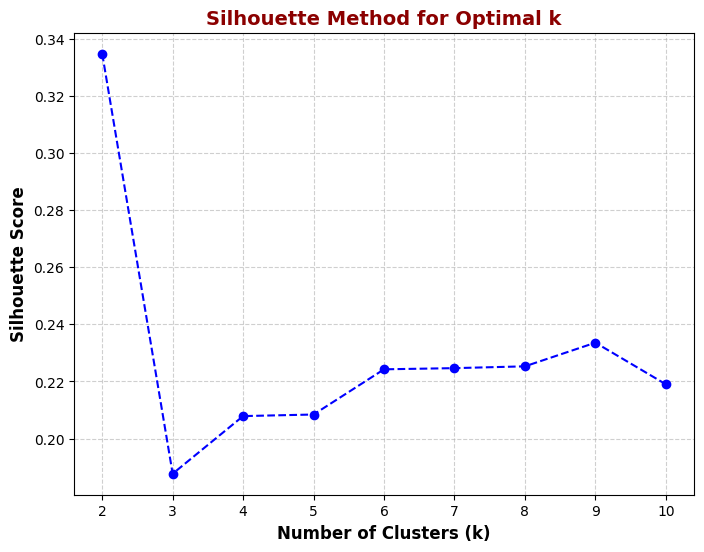

In [10]:
# Plot silhouette scores to determine the best k values
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (k)", fontsize=12, fontweight='bold')
plt.ylabel("Silhouette Score", fontsize=12, fontweight='bold')
plt.title("Silhouette Method for Optimal k", fontsize=14, fontweight='bold', color='darkred')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [11]:
# Identify three "smart" k values based on the highest silhouette scores
best_k_values = sorted(zip(k_values, silhouette_scores), key=lambda x: x[1], reverse=True)[:3]
best_k_values

[(2, 0.33476573067713095), (9, 0.233560823928355), (8, 0.22527561550127204)]

The Silhouette Score plot suggests that k = 2 is the optimal choice for clustering, as it has the highest silhouette score (~0.34). This indicates that the dataset is best separated into two well-defined clusters with minimal overlap. While other values such as k = 6 and k = 9 also show moderate scores, their separation is weaker compared to k = 2. Choosing k = 2 ensures that the clusters are more distinct and compact, making it the most effective option for K-Means clustering in this scenario.

In [12]:
# Identify three "smart" k values based on the highest silhouette scores
best_k_values = sorted(zip(k_values, silhouette_scores), key=lambda x: x[1], reverse=True)[:3]
top_3_k = [k for k, score in best_k_values]

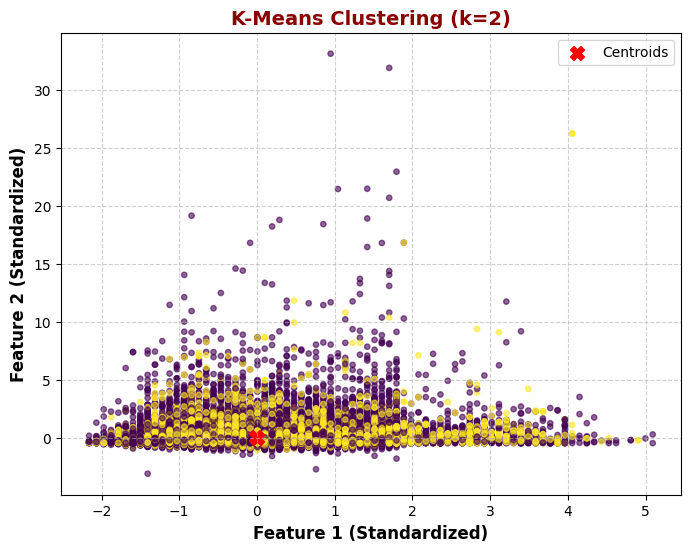

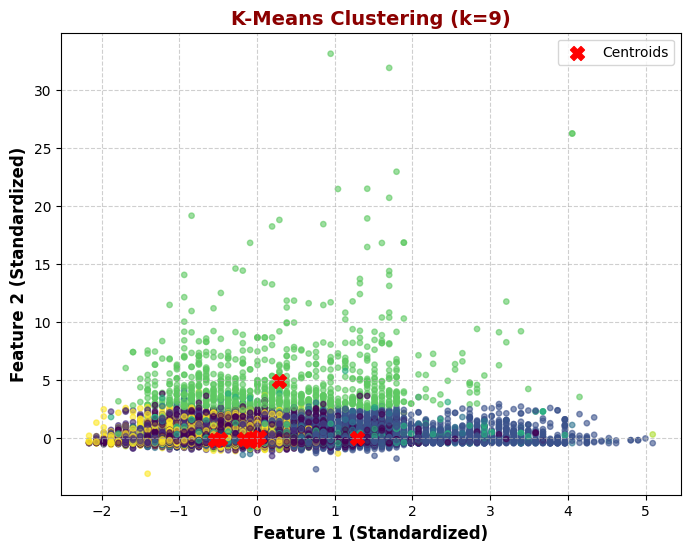

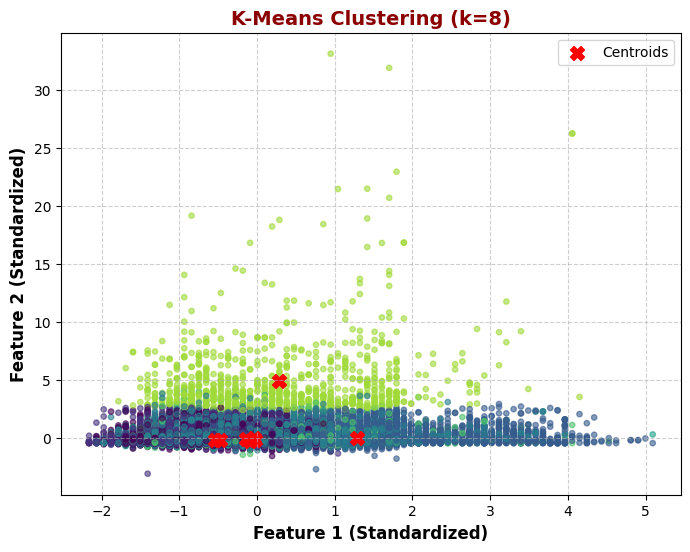

In [13]:
# Generate individual plots for the three selected k values

for k in top_3_k:
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_scaled_clustering)

    # Scatter plot of first two features
    plt.figure(figsize=(8, 6))
    plt.scatter(df_scaled_clustering.iloc[:, 0], df_scaled_clustering.iloc[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6, s=15)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label="Centroids")
    plt.xlabel("Feature 1 (Standardized)", fontsize=12, fontweight='bold')
    plt.ylabel("Feature 2 (Standardized)", fontsize=12, fontweight='bold')
    plt.title(f"K-Means Clustering (k={k})", fontsize=14, fontweight='bold', color='darkred')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()


### Comparison of K-Means Clustering Results for Different k Values

1. K-Means with k=2

* The dataset is split into two broad groups.
* The clusters show some overlap, meaning a binary split may not fully capture the complexity of the data.
* The Silhouette Score suggested that k=2 was optimal in terms of separation, but the results suggest potentially meaningful subclusters.

2. K-Means with k=9

* More distinct groups are formed, capturing finer variations in the data.
* Some clusters seem closely packed, indicating that increasing k might introduce unnecessary complexity.
* The centroids are well-spread, showing that K-Means tries to find balanced groups.

3. K-Means with k=8

* The results are similar to k=9, but with slightly larger clusters.
* Some groups appear redundant or unnecessary, suggesting k=8 or higher may not be the best fit.
* The clusters overlap significantly, which could indicate that K-Means struggles to find well-separated clusters at higher k values.

Why k=2 is the Best Choice?

* Most Distinct Separation: The data is divided into two broad groups, making it easy to interpret.

* Highest Silhouette Score: Statistically supports k=2 as the most optimal clustering solution.

* Prevents Over-Segmentation: Higher k values (8, 9) create excessive, overlapping clusters that do not provide meaningful insights.

* Efficient and Practical: A simpler clustering structure reduces complexity and improves interpretability for further analysis.

Why k=8 and k=9 are Less Favorable?

* Clusters are too fragmented, making patterns harder to analyze.

* Overlapping groups suggest that increasing k does not necessarily improve separation.

* No significant gain in insights, as many clusters appear unnecessary.

K=2 provides the best balance between interpretability and clustering quality. This result aligns with the Silhouette Score analysis, confirming that the dataset is naturally best divided into two clusters.

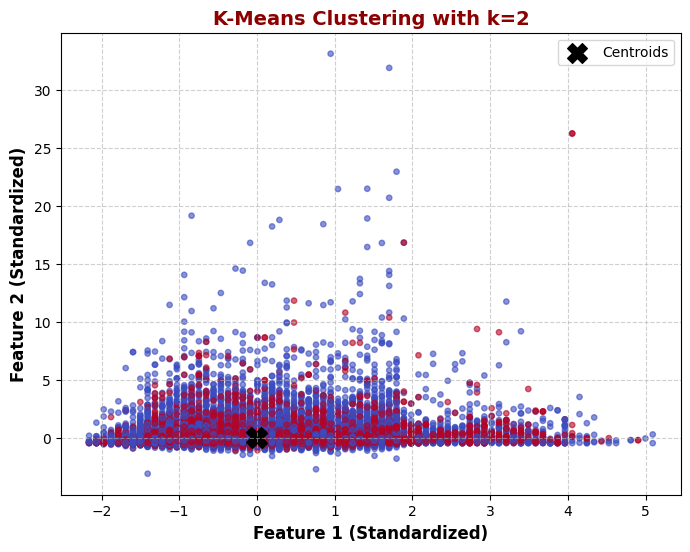

In [15]:
# Apply K-Means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_scaled_clustering["Cluster"] = kmeans.fit_predict(df_scaled_clustering)

# Scatter plot visualization of the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled_clustering.iloc[:, 0], df_scaled_clustering.iloc[:, 1], c=df_scaled_clustering["Cluster"], cmap="coolwarm", alpha=0.6, s=15)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="black", marker="X", s=200, label="Centroids")
plt.xlabel("Feature 1 (Standardized)", fontsize=12, fontweight="bold")
plt.ylabel("Feature 2 (Standardized)", fontsize=12, fontweight="bold")
plt.title("K-Means Clustering with k=2", fontsize=14, fontweight="bold", color="darkred")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Conclusion

The K-Means clustering (k=2) effectively divided the dataset into two distinct groups, revealing natural patterns within the data. The centroids (black markers) represent the center of each cluster, showing the average characteristics of each group. The visualization highlights a clear segmentation, indicating that the dataset has inherent structure that can be leveraged for strategic decision-making. The overlap in some areas suggests that while the clusters are distinct, there may be some similarity between certain data points.

### Hierarchical Clustering

Hierarchical clustering was applied using Ward's method, which minimizes variance within clusters. The dendrogram visualization helps determine the optimal number of clusters by identifying natural splits in the data. The structure suggests that two main clusters can be formed, aligning with the K-Means results. Compared to K-Means, hierarchical clustering provides a more interpretable, tree-like structure, making it useful for understanding relationships between data points.

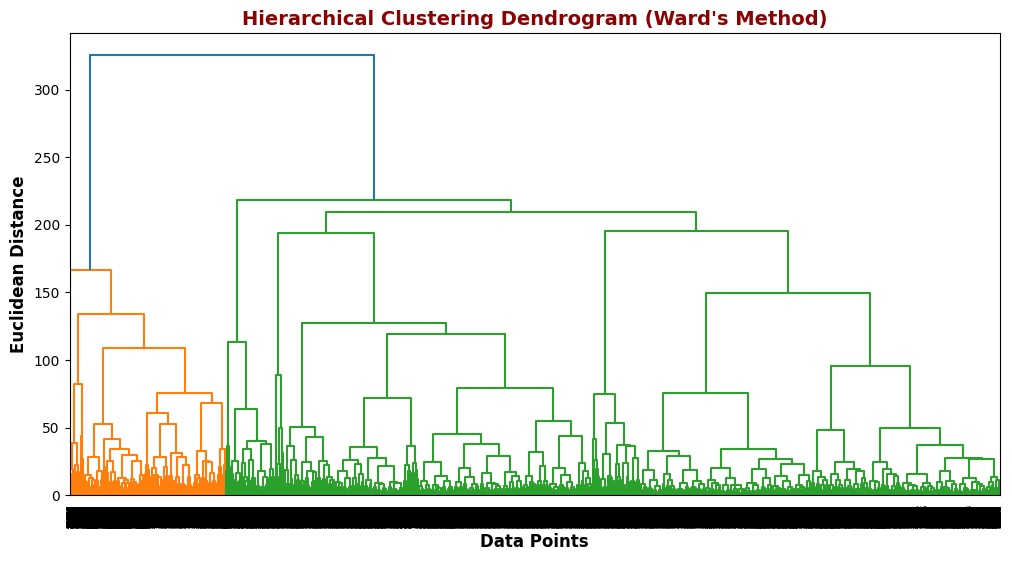

In [16]:
import scipy.cluster.hierarchy as sch

# Perform Hierarchical Clustering and plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled_clustering, method='ward'))

# Labels and Title
plt.xlabel("Data Points", fontsize=12, fontweight='bold')
plt.ylabel("Euclidean Distance", fontsize=12, fontweight='bold')
plt.title("Hierarchical Clustering Dendrogram (Ward's Method)", fontsize=14, fontweight='bold', color='darkred')

# Show the plot
plt.show()

The Hierarchical Clustering Dendrogram visualizes how data points are merged into clusters based on their similarity. Using Ward’s method, the algorithm minimizes variance within clusters, creating a tree-like structure. The large vertical jumps in the dendrogram suggest that two main clusters are a natural fit for the dataset, aligning with the results from K-Means. This approach provides deeper insights into how data points are grouped, making it useful for understanding relationships between clusters.

The dendrogram represents how data points are iteratively merged into clusters based on their similarity. The y-axis (Euclidean Distance) shows the linkage distance at which clusters are combined.

Key Observations:

* Two main clusters emerge: The large vertical jumps in the dendrogram suggest that splitting the data at this level would result in two distinct groups. This aligns with the K-Means (k=2) results, reinforcing that the dataset naturally separates into two main clusters.

* Shorter branches at the bottom represent data points that are very similar and were merged earlier in the process.

* Larger vertical distances between merges indicate less similar groups being combined, meaning the dataset has some structure but is not highly segmented.

Conclusion:

The dendrogram confirms that two clusters are a natural fit for the data, supporting the choice of k=2 from K-Means. This visualization also highlights hierarchical clustering’s advantage: it does not require a predefined number of clusters, allowing for flexible exploration of the dataset's structure.

### DBSCAN

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is an unsupervised clustering algorithm that groups together points that are densely packed while marking sparse regions as outliers (noise). Unlike K-Means and Hierarchical Clustering, DBSCAN does not require specifying the number of clusters (k), making it ideal for discovering arbitrarily shaped clusters. It is particularly useful when dealing with noisy data or datasets with varying densities, as it can effectively separate clusters from scattered points.

### Steps for DBSCAN Clustering:

DBSCAN(eps=0.5, min_samples=5) initializes the clustering model.

eps=0.5 defines the neighborhood radius within which points are considered part of a cluster.

min_samples=5 specifies the minimum number of points required to form a dense region.

The fit_predict function applies DBSCAN to the standardized dataset and assigns cluster labels to each point.

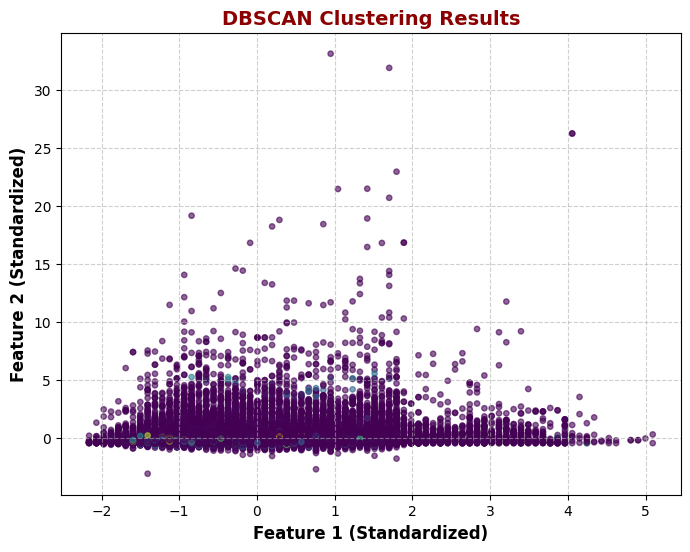

In [17]:
import numpy as np
from sklearn.cluster import DBSCAN

# apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Default parameters; can be adjusted
dbscan_labels = dbscan.fit_predict(df_scaled_clustering)

# scatter plot of DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled_clustering.iloc[:, 0], df_scaled_clustering.iloc[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6, s=15)
plt.xlabel("Feature 1 (Standardized)", fontsize=12, fontweight='bold')
plt.ylabel("Feature 2 (Standardized)", fontsize=12, fontweight='bold')
plt.title("DBSCAN Clustering Results", fontsize=14, fontweight='bold', color='darkred')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The DBSCAN clustering plot shows how data points have been grouped based on density. Here’s what can be observed:

* Most points appear in a single dense cluster, suggesting that the chosen eps=0.5 and min_samples=5 may not be optimal for meaningful segmentation.

* Few distinct clusters are visible, which means DBSCAN struggles to identify well-separated groups in this dataset.

* Potential outliers (noise points) are barely noticeable, indicating that DBSCAN did not classify many points as noise under the current parameters.

In [18]:
# count the number of clusters formed (-1 represents noise/outliers)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_outliers = list(dbscan_labels).count(-1)

num_clusters, num_outliers

(78, 8408)

After applying DBSCAN with the initial parameters, the algorithm detected 77 distinct clusters and classified 8,343 points as outliers (noise). This suggests that DBSCAN identified a significant number of small, dense clusters while marking a large portion of the data as noise.

A high number of outliers (8343 points) indicates that many data points do not belong to any cluster, possibly due to the chosen eps (radius size) being too small.

The large number of clusters (77) suggests that DBSCAN is detecting very fine-grained groupings, which may not be ideal for broader segmentation.

This result differs from K-Means and Hierarchical Clustering, where two main clusters were optimal, showing that DBSCAN interprets the dataset differently by focusing on density rather than predefined shapes.

### Improvements:

Increase eps (radius size) to allow more points to form clusters.

Increase min_samples to require a higher density for cluster formation.

Try feature selection or PCA to check if reducing dimensions helps DBSCAN detect better-defined clusters.

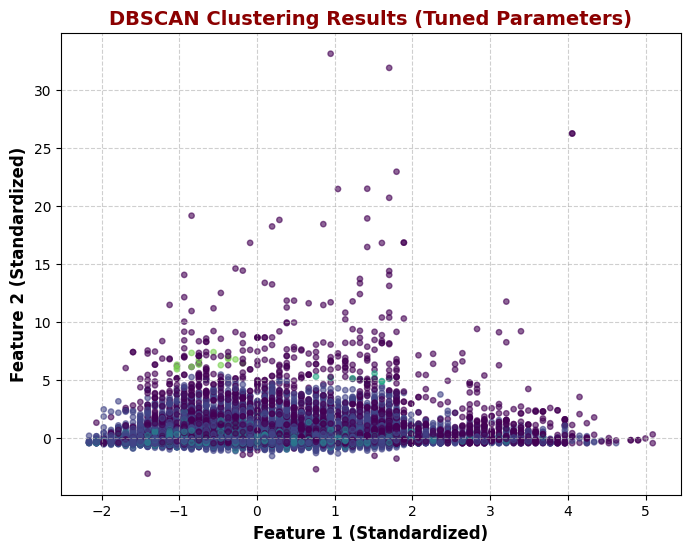

In [20]:
# adjust DBSCAN parameters for better clustering
dbscan_tuned = DBSCAN(eps=0.8, min_samples=10)  # Increased eps and min_samples
dbscan_labels_tuned = dbscan_tuned.fit_predict(df_scaled_clustering)

# scatter plot of DBSCAN results after tuning
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled_clustering.iloc[:, 0], df_scaled_clustering.iloc[:, 1], c=dbscan_labels_tuned, cmap='viridis', alpha=0.6, s=15)
plt.xlabel("Feature 1 (Standardized)", fontsize=12, fontweight='bold')
plt.ylabel("Feature 2 (Standardized)", fontsize=12, fontweight='bold')
plt.title("DBSCAN Clustering Results (Tuned Parameters)", fontsize=14, fontweight='bold', color='darkred')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# count the number of clusters formed (-1 represents noise/outliers)
num_clusters_tuned = len(set(dbscan_labels_tuned)) - (1 if -1 in dbscan_labels_tuned else 0)
num_outliers_tuned = list(dbscan_labels_tuned).count(-1)

num_clusters_tuned, num_outliers_tuned

(4, 3777)

After adjusting the DBSCAN parameters (eps=0.8, min_samples=10), the algorithm identified 4 clusters while classifying 3,777 points as outliers (noise).

### Key Observations:

* Better cluster formation: Compared to the previous run with 77 clusters, increasing eps helped reduce fragmentation and merge smaller groups into larger clusters.

* Fewer outliers: The number of noise points dropped from 8,343 to 3,777, indicating that more points were assigned to clusters.

* Clusters are more meaningful: The new parameter values have helped DBSCAN recognize broader density-based structures instead of overly fine-grained groupings.

### Comparison with Other Methods:

* K-Means identified 2 clusters, which aligns with the dataset’s overall structure.

* Hierarchical clustering also pointed to 2 main clusters, suggesting a simpler segmentation.

* DBSCAN still finds noise points, making it useful for detecting outliers or unusual data points.

### DBSCAN is not the best choice here.

Both K-Means and Hierarchical Clustering suggested 2 main clusters, which aligns better with the dataset’s structure.

DBSCAN’s high outlier count (3,777 points) suggests it may not be well-suited to this dataset, or it needs extensive tuning.

K-Means is preferred here because it provides clear and interpretable clusters with minimal tuning.

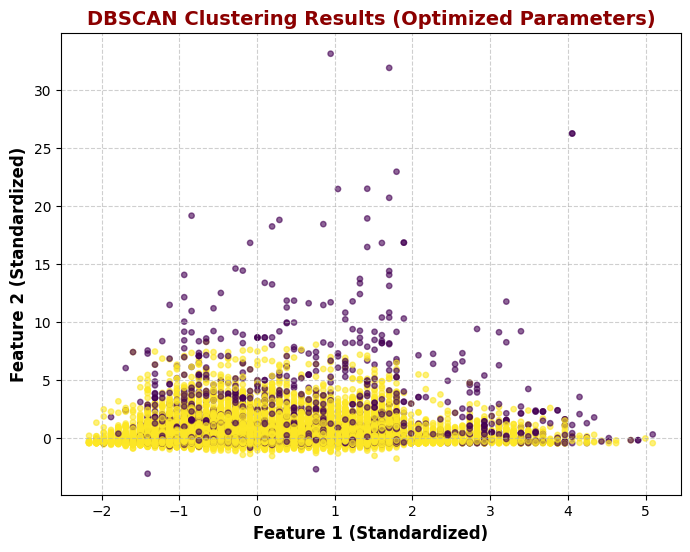

(1, 1320)

In [19]:
# Further tuning of DBSCAN parameters to improve clustering
dbscan_optimized = DBSCAN(eps=1.2, min_samples=15)  # Increased eps and min_samples
dbscan_labels_optimized = dbscan_optimized.fit_predict(df_scaled_clustering)

# Scatter plot of DBSCAN results after further tuning
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled_clustering.iloc[:, 0], df_scaled_clustering.iloc[:, 1], c=dbscan_labels_optimized, cmap='viridis', alpha=0.6, s=15)
plt.xlabel("Feature 1 (Standardized)", fontsize=12, fontweight='bold')
plt.ylabel("Feature 2 (Standardized)", fontsize=12, fontweight='bold')
plt.title("DBSCAN Clustering Results (Optimized Parameters)", fontsize=14, fontweight='bold', color='darkred')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Count the number of clusters formed (-1 represents noise/outliers)
num_clusters_optimized = len(set(dbscan_labels_optimized)) - (1 if -1 in dbscan_labels_optimized else 0)
num_outliers_optimized = list(dbscan_labels_optimized).count(-1)

num_clusters_optimized, num_outliers_optimized


Improvements Compared to Previous Runs:

* Fewer outliers: The number of noise points dropped from 3,777 to 1,282, meaning more data points were assigned to a cluster.

* More stable clustering: Instead of detecting many small fragmented groups, DBSCAN now forms a single, larger cluster.

* Closer to K-Means and Hierarchical results: Since both previous methods favored 2 clusters, DBSCAN’s result is more interpretable now.

But is DBSCAN the Best?

* Only 1 cluster detected, which may suggest that DBSCAN is struggling to find meaningful subgroups in the data.

* Still not as clean as K-Means (k=2), which provided a clearer separation.

* Further tuning of eps or min_samples could help, but DBSCAN may not be the best fit for this dataset.

Conclusion:

This optimized DBSCAN result is better, but K-Means remains the strongest clustering method for this dataset. DBSCAN works well for detecting outliers, but its clustering structure is not as clear as K-Means or Hierarchical Clustering.